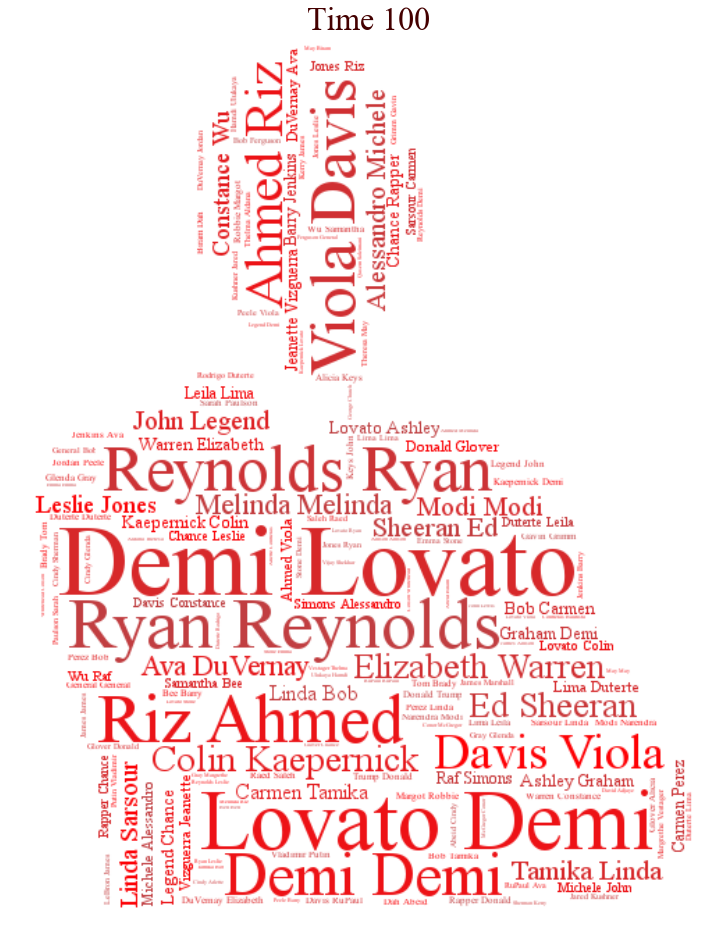

In [2]:
# Magic command for displaying chart in Jupyter Notebook
%matplotlib inline

# Import all the modules
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# Import Amueller's word_cloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import random

# Word cloud has default colors but to be in the same brand theme with Time, I am using red.
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(359, %d%%, 50%%)" % random.randint(50, 99)

# And I am using the Times New Roman font from my library.
csfont = {'fontname':'Times New Roman'}

# Read though the individual text files
text_files  = []
for file in os.listdir("text"):
    if file.endswith(".txt"):
        text_files.append(file)

# Set the location of files and destinations of image
t = path.dirname('C:/Users/Allan/Documents/GitHub/time100/text/')
m = path.dirname('C:/Users/Allan/Documents/GitHub/time100/')
w = path.dirname('C:/Users/Allan/Documents/GitHub/time100/wordclouds/')

# Set the stop word. Although we ignored this during the data wrangling, 
# there are still words in English and Spanish that are articles like "The" from Chance The Rapper, and "And" for 
# Those names are in group of people.
stopwords = set(STOPWORDS)

# read the mask image
mask_image = np.array(Image.open(path.join(m, 'obama.jpg')))
image_colors = ImageColorGenerator(mask_image)

# Reasd though each text files
for idx, text_file in enumerate(text_files):
    # Read the whole text.
    words = open(path.join(t, text_file), encoding='latin1').read()

    # And combined to another text file.
    with open('text/combined_v2.txt', 'a+', encoding='latin1') as co:
        co.write(words+" ")

# Open the combined text file.       
words = open(path.join(t, 'combined_v2.txt'), encoding='latin1').read()

# generate word cloud
wc = WordCloud(background_color='white', mask=mask_image,  margin=5,
               stopwords=stopwords, font_path='C:/Windows/Fonts/times.ttf',
               random_state=1).generate(words)
# wordcloud module has a method to store image to file but I would use teh fig to be saved into image instead. See at the end.
# wc.to_file(path.join(w, text_file+".png")) 

# Set figure and plot
plt.figure(idx) 
plt.figure(figsize = (15,16))
plt.subplot(111)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plttitle = plt.title('Time 100', fontsize=32, **csfont)
plt.setp(plttitle, color='#440000', horizontalalignment='center', verticalalignment='bottom')
plt.axis("off")
plt.savefig(path.join(w, 'Time100_2017_V2.png'))